In [353]:
import pandas as pd
import plotly.express as plt
import plotly.graph_objects as go

In [354]:
eustat_original = pd.read_csv('GVA.csv')

In [355]:
eustat_original.head(10)

,Country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,:,:,:,:,:,:,:,:,:,...,"18,713.50","19,008.00","19,294.00","19,678.40","20,149.90","21,767.40","22,628.00","22,019.80","24,298.90","26,484.10"
1,Bulgaria,:,:,:,:,:,:,:,:,:,...,"1,725.50","1,651.30","1,726.50","1,646.60","1,866.10","2,034.60","2,366.80","2,614.30","2,338.40","2,636.40"
2,Czechia,:,:,:,:,:,:,:,:,:,...,"8,215.70","8,048.30","8,636.50","8,721.30","9,547.70","10,630.70","11,489.50","11,088.60","12,110.80","14,423.30"
3,Denmark,"2,045.30","2,390.60","2,522.10","2,602.50","2,518.70","2,790.80","2,564.20","2,627.70","2,775.10",...,"10,145.20","10,532.70","11,749.90","13,380.40","14,328.80","14,828.70","14,716.50","14,860.20","16,275.10","19,183.40"
4,Germany,:,:,:,:,:,:,:,:,:,...,"112,226.00","119,583.00","124,907.00","132,548.00","137,994.00","148,044.00","154,323.00","167,329.00","179,802.00","211,102.00"
5,Estonia,:,:,:,:,:,:,:,:,:,...,"1,163.60","1,079.10","1,098.50","1,229.50","1,379.70","1,561.80","1,669.80","1,651.80","1,845.80","2,198.50"
6,Ireland,:,:,:,:,:,:,:,:,:,...,"3,477.50","4,427.40","4,908.80","5,734.50","7,478.10","8,055.20","8,778.90","8,178.60","8,717.80","11,051.30"
7,Greece,:,:,:,:,:,:,:,:,:,...,"5,153.90","3,738.40","3,493.40","3,484.20","2,259.10","2,431.20","2,573.70","2,681.30","2,925.10","3,945.10"
8,Spain,:,:,:,:,:,:,:,:,:,...,"53,763.00","53,254.00","56,422.00","59,362.00","62,061.00","64,459.00","70,821.00","61,880.00","60,865.00","63,162.00"
9,France,"20,036.70","21,680.90","22,869.30","25,723.60","28,587.40","33,291.00","34,214.40","36,563.70","36,565.60",...,"111,927.00","110,116.00","107,884.00","108,362.00","113,137.00","117,386.00","124,114.00","108,963.00","125,454.00","129,235.00"


In [356]:
# Melt the dataset by 'Countries'
melted_eustat = pd.melt(eustat_original, id_vars='Country', var_name='Year', value_name='Gross Value Added (€M)')

# Sort the dataset by 'Country' and 'Year'
melted_eustat = melted_eustat.sort_values(['Country', 'Year']).reset_index(drop=True)

# Print the resulting melted dataset
melted_eustat.head(10)

,Country,Year,Gross Value Added (€M)
0,Albania,1975,:
1,Albania,1976,:
2,Albania,1977,:
3,Albania,1978,:
4,Albania,1979,:
5,Albania,1980,:
6,Albania,1981,:
7,Albania,1982,:
8,Albania,1983,:
9,Albania,1984,:


### Why Gross Value Added for the construction sector?
Gross Value Added (GVA) for the construction sector measures the value created by the industry. It reflects the difference between the value of goods and services produced and the cost of inputs used in the construction process. GVA is a vital indicator of economic performance and productivity within the construction sector. It helps determine the sector's contribution to the overall economy and provides insights into its growth and health. By subtracting the cost of materials and services from the total value of output, GVA represents the value added by the construction sector through production activities such as wages, profits, and other factors.

In [357]:
country_codes = pd.read_csv('country_codes.tsv', sep='\t')

In [358]:
# Merge the two datasets by 'Country'
eustat = pd.merge(melted_eustat, country_codes, left_on='Country', right_on='Country', how='left')
eustat.head(10)


,Country,Year,Gross Value Added (€M),Alpha-2 code,Alpha-3 code,Numeric
0,Albania,1975,:,AL,ALB,8
1,Albania,1976,:,AL,ALB,8
2,Albania,1977,:,AL,ALB,8
3,Albania,1978,:,AL,ALB,8
4,Albania,1979,:,AL,ALB,8
5,Albania,1980,:,AL,ALB,8
6,Albania,1981,:,AL,ALB,8
7,Albania,1982,:,AL,ALB,8
8,Albania,1983,:,AL,ALB,8
9,Albania,1984,:,AL,ALB,8


In [359]:
# Let's drop the Alpha-2 code and Numeric columns because we don't need them
eustat = eustat.drop(['Alpha-2 code', 'Numeric'], axis=1)
eustat.head(10)

,Country,Year,Gross Value Added (€M),Alpha-3 code
0,Albania,1975,:,ALB
1,Albania,1976,:,ALB
2,Albania,1977,:,ALB
3,Albania,1978,:,ALB
4,Albania,1979,:,ALB
5,Albania,1980,:,ALB
6,Albania,1981,:,ALB
7,Albania,1982,:,ALB
8,Albania,1983,:,ALB
9,Albania,1984,:,ALB


In [360]:
import numpy as np

# Let's convert the : to NaN
eustat['Gross Value Added (€M)'] = eustat['Gross Value Added (€M)'].replace(':', np.nan)  # Use np.nan, not 'NaN'

eustat.head(10)


,Country,Year,Gross Value Added (€M),Alpha-3 code
0,Albania,1975,NaN,ALB
1,Albania,1976,NaN,ALB
2,Albania,1977,NaN,ALB
3,Albania,1978,NaN,ALB
4,Albania,1979,NaN,ALB
5,Albania,1980,NaN,ALB
6,Albania,1981,NaN,ALB
7,Albania,1982,NaN,ALB
8,Albania,1983,NaN,ALB
9,Albania,1984,NaN,ALB


In [361]:
# Let's convert the Year column to datetime
eustat['Year'] = pd.to_datetime(eustat['Year'])

# Let's make the Year column format to YYYY
eustat['Year'] = eustat['Year'].dt.year

eustat.head(10)



,Country,Year,Gross Value Added (€M),Alpha-3 code
0,Albania,1975,NaN,ALB
1,Albania,1976,NaN,ALB
2,Albania,1977,NaN,ALB
3,Albania,1978,NaN,ALB
4,Albania,1979,NaN,ALB
5,Albania,1980,NaN,ALB
6,Albania,1981,NaN,ALB
7,Albania,1982,NaN,ALB
8,Albania,1983,NaN,ALB
9,Albania,1984,NaN,ALB


In [362]:
# Change the name of the column of "Alpha-3 code" to "Country Code"
eustat = eustat.rename(columns={'Alpha-3 code': 'Country Code'})

In [363]:
eustat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 1680 non-null   object
 1   Year                    1680 non-null   int32 
 2   Gross Value Added (€M)  1046 non-null   object
 3   Country Code            1680 non-null   object
dtypes: int32(1), object(3)
memory usage: 46.1+ KB


In [364]:
# Let's convert the GVA column to float type
eustat['Gross Value Added (€M)'] = eustat['Gross Value Added (€M)'].str.replace(',', '').astype(float)

eustat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1680 non-null   object 
 1   Year                    1680 non-null   int32  
 2   Gross Value Added (€M)  1046 non-null   float64
 3   Country Code            1680 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 46.1+ KB


In [365]:
eustat.sample(5)

,Country,Year,Gross Value Added (€M),Country Code
747,Iceland,2002,704.0,ISL
1539,Sweden,1978,NaN,SWE
1564,Sweden,2003,12316.6,SWE
1649,United Kingdom,1992,NaN,GBR
1294,Portugal,2021,8938.6,PRT


In [366]:
# Let's make the GVA column format to millions
eustat['Gross Value Added (€M)'] = eustat['Gross Value Added (€M)'] * 1000000
eustat.sample(5)


,Country,Year,Gross Value Added (€M),Country Code
1525,Spain,2012,6.270300e+10,ESP
1185,Norway,2008,1.509590e+10,NOR
173,Bosnia and Herzegovina,2004,3.410000e+08,BIH
455,Estonia,1998,3.121000e+08,EST
476,Estonia,2019,1.669800e+09,EST


In [367]:
# In the dataset GVA was in thousands, so we multiplied it by 1000000 to make it in millions. So let's change the name of the column to "Gross Value Added (€M)"
# We do not need to say "in millions" because we already multiplied it by 1000000
eustat = eustat.rename(columns={'Gross Value Added (€M)': 'Gross Value Added'})


In [368]:
eustat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1680 non-null   object 
 1   Year               1680 non-null   int32  
 2   Gross Value Added  1046 non-null   float64
 3   Country Code       1680 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 46.1+ KB


In [369]:
# My dataset is small I could have a look at it manually but I'd rather use a the missingno library to visualize the missing data for better understanding
# And with plotly express I can visualize the correlation of missing data between columns
import missingno as msno
import plotly.express as px

def display_missing(eustat):
    # Visualize the correlation of missing data between columns
    fig = px.imshow(eustat.isnull().T, labels=dict(x="Columns", y="Rows"), color_continuous_scale=["lightyellow", "darkblue"])

    # Set the title of the figure
    fig.update_layout(title="Missing Data Correlation Matrix for EUSTAT")

    # Change the position of the x-axis labels
    fig.update_xaxes(side="bottom")

    # Change the x-axis label rotation to 0 degrees
    fig.update_xaxes(tickangle=0)

    # Show the plot
    fig.show()

display_missing(eustat)

In [370]:
# Let's interpolate the missing values with linear interpolation to keep the trend of the data and fill the missing values
eustat['Gross Value Added'] = eustat['Gross Value Added'].interpolate(method='linear', limit_direction='forward')

In [371]:
display_missing(eustat)

# DISPLAYING VALUE ADDITION 

In [372]:
import plotly.express as px

# Calculate the minimum and maximum values of the 'Gross Value Added (€M)' column
min_value = eustat['Gross Value Added'].min()
max_value = eustat['Gross Value Added'].max()

# Create a choropleth map using the 'eustat' DataFrame, with countries represented by their country codes, and colors based on 'Gross Value Added (€M)'
fig = px.choropleth(
    eustat,
    locations='Country Code',
    hover_name='Country',
    color_continuous_scale='plasma',
    animation_frame='Year',
    color='Gross Value Added',
    title='GVA for Construction Sector',
    range_color=(min_value, max_value)
)

# Update the layout of the figure, including the title and the geographic projection
fig.update_layout(
    title_text='Gross Value Added for Construction Sector in Europe',
    geo=dict(
        scope='europe',
        projection_type='natural earth'
    ),
)

fig.show()


In [373]:
# Let's drop the missing values for further analysis
eustat_nomissing = eustat.dropna()

# Let's check if there are any missing values left
eustat_nomissing.isnull().sum()

Country              0
Year                 0
Gross Value Added    0
Country Code         0
dtype: int64

In [374]:
eustat_nomissing.head(60)

,Country,Year,Gross Value Added,Country Code
21,Albania,1996,1.795000e+08,ALB
22,Albania,1997,1.727000e+08,ALB
23,Albania,1998,1.634000e+08,ALB
24,Albania,1999,2.591000e+08,ALB
25,Albania,2000,4.285000e+08,ALB
26,Albania,2001,6.160000e+08,ALB
27,Albania,2002,7.502000e+08,ALB
28,Albania,2003,7.787000e+08,ALB
29,Albania,2004,9.052000e+08,ALB
30,Albania,2005,9.933000e+08,ALB


In [375]:
# Let's see the highest GVA for each country
eustat.groupby('Country')['Gross Value Added'].max().sort_values(ascending=False).head(20)

Country
Germany                   2.111020e+11
Greece                    2.013017e+11
United Kingdom            1.513309e+11
France                    1.292350e+11
Spain                     1.155490e+11
Italy                     8.965540e+10
Latvia                    8.438100e+10
Sweden                    6.025936e+10
Netherlands               4.010000e+10
Switzerland               3.670080e+10
Poland                    3.625910e+10
Portugal                  3.398647e+10
Austria                   3.137210e+10
Belgium                   3.037853e+10
Bosnia and Herzegovina    2.547900e+10
Norway                    2.444430e+10
Denmark                   1.918340e+10
Estonia                   1.827799e+10
Romania                   1.816360e+10
Serbia                    1.737995e+10
Name: Gross Value Added, dtype: float64

## The main purpose of this analysis is to identify the reasons for the Value Addition of Gross from the Construction Sector in Ireland.

Firstly, we will prepare the datasets;

- Planning Permissions in All types of Construction in Ireland
- New and Second Hand House Prices in Ireland
- Persons aged 15 years and over in Employment in Construction of Buildings
- House Building Cost (1991=100)
- Census Population
- Value Addition of Gross from the Construction Sector in Ireland

# DATA PREPARATION

## Number of Planning Permission Granted

- Displaying missing values
- Handling missing values with interpolation

In [376]:
planning_permission = pd.read_csv('Planning Permission Granted.csv')

In [377]:
planning_permission.head()

,Year,Total Floor Area for which Permission Granted(All types of Construction)
0,1977,NaN
1,1978,NaN
2,1979,NaN
3,1980,NaN
4,1981,NaN


In [378]:
# Let's change the name of Total Floor Area for which Permission Granted(All types of Construction) column to Construction Permission
planning_permission = planning_permission.rename(columns={'Total Floor Area for which Permission Granted(All types of Construction)': 'Construction Permission'})
planning_permission.sample(10)

,Year,Construction Permission
4,1981,NaN
3,1980,NaN
28,2005,19995.0
16,1993,4614.0
29,2006,19288.0
43,2020,8033.0
15,1992,4565.0
35,2012,3198.0
38,2015,4861.0
25,2002,14420.0


In [379]:
# pip install missingno


In [380]:
permission_granted = 'Construction Permission'

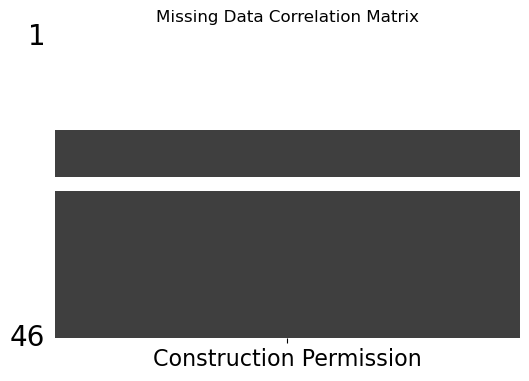

In [381]:
import matplotlib.pyplot as plt
import missingno as msno

# Set the figure size
fig, axes = plt.subplots(figsize=(6, 4))

# Visualize the correlation of missing data between columns
msno.matrix(planning_permission[permission_granted].to_frame(), ax=axes, sparkline=False)

# Set the title of the figure
plt.title('Missing Data Correlation Matrix')

# Change the position of the xticks labels
plt.gca().xaxis.tick_bottom()

# Change the x-axis label rotation to 0 degrees
plt.xticks(rotation=0, ha='center')

# Display the visualization
plt.show()


- As we see in the missing data correlation matrix; there are few missing values, to handle this issue interpolation is one of the technique can be useful in this case

In [382]:
planning_permission.tail(15)

,Year,Construction Permission
31,2008,16799.0
32,2009,10190.0
33,2010,5256.0
34,2011,4076.0
35,2012,3198.0
36,2013,3338.0
37,2014,3184.0
38,2015,4861.0
39,2016,5543.0
40,2017,6019.0


In [383]:
# Let's make interpolation for the missing values
planning_permission = planning_permission.interpolate()

planning_permission.head(10)

,Year,Construction Permission
0,1977,NaN
1,1978,NaN
2,1979,NaN
3,1980,NaN
4,1981,NaN
5,1982,NaN
6,1983,NaN
7,1984,NaN
8,1985,NaN
9,1986,NaN


In [384]:
planning_permission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     46 non-null     int64  
 1   Construction Permission  31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 864.0 bytes


In [385]:
# Let's fill the missing values with 0 to make the column type integer
planning_permission['Construction Permission'].fillna(0, inplace=True) # Let's fill the missing values with 0

In [386]:
# Let's change the Total Floor Area column to int type
planning_permission['Construction Permission'] = planning_permission['Construction Permission'].astype(int)

In [387]:
# Let's convert the Year column to datetime and make the format YYYY before converting it to period
planning_permission['Year'] = pd.to_datetime(planning_permission['Year'], format='%Y').dt.to_period('Y') 

In [388]:
# Let's set the Year column as index column
planning_permission.set_index('Year', inplace=True) 


In [389]:
planning_permission.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 46 entries, 1977 to 2022
Freq: A-DEC
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Construction Permission  46 non-null     int64
dtypes: int64(1)
memory usage: 736.0 bytes


In [390]:
planning_permission.tail(10)

,Construction Permission
Year,
2013,3338
2014,3184
2015,4861
2016,5543
2017,6019
2018,7458
2019,8233
2020,8033
2021,8542


In [391]:
# Resample the data into quarterly frequency and fill the missing values with NaN
planning_permission = planning_permission.resample('Q').asfreq()

In [392]:
# Interpolate the missing values within each quarter using linear interpolation method 
planning_permission.interpolate(method='linear', inplace=True)

In [393]:
planning_permission.head(10)

,Construction Permission
Year,
1977Q1,0.0
1977Q2,0.0
1977Q3,0.0
1977Q4,0.0
1978Q1,0.0
1978Q2,0.0
1978Q3,0.0
1978Q4,0.0
1979Q1,0.0


In [394]:
# Let's change the name of Total Floor Area for which Permission Granted(All types of Construction) column to Construction Permission
planning_permission = planning_permission.rename(columns={'Total Floor Area for which Permission Granted(All types of Construction)': 'Construction Permission'})
planning_permission.sample(10)

,Construction Permission
Year,
1997Q2,8670.00
1988Q2,0.00
2006Q3,21636.50
1986Q1,0.00
1990Q4,0.00
1989Q3,0.00
2004Q1,18719.00
1978Q3,0.00
1984Q1,0.00


# New and Second Hand House Prices in Ireland
- New and second house prices are shown in Euro on quarterly based.

In [395]:
house_prices = pd.read_csv('New House Prices in Ireland.csv')

In [396]:
house_prices.tail(10)

,Quarter,New House Prices in IE (€),Second Hand House Prices(€)
158,2014Q3,247398,264394.0
159,2014Q4,258989,255958.0
160,2015Q1,267517,259385.0
161,2015Q2,275235,266787.0
162,2015Q3,285015,267530.0
163,2015Q4,298551,263616.0
164,2016Q1,309703,264258.0
165,2016Q2,314950,277452.0
166,2016Q3,304307,276759.0
167,2016Q4,322680,284348.0


In [397]:
house_prices.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Quarter                      168 non-null    object 
 1   New House Prices in IE (€)   168 non-null    int64  
 2   Second Hand House Prices(€)  156 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [398]:
# Let's change the name of Second Hand House Prices column to Second Hand House Prices in IE(€)
house_prices = house_prices.rename(columns={'Second Hand House Prices(€)': 'Second Hand House Prices in IE(€)'})

In [399]:
# Let's convert the New House Prices column to int type
house_prices['New House Prices in IE (€)'] = house_prices['New House Prices in IE (€)'].astype(int)

In [400]:
# replace non-finite values with 0
house_prices['Second Hand House Prices in IE(€)'].fillna(0, inplace=True)

In [401]:
# Let's convert the Second-Hand House Prices column to int type
house_prices['Second Hand House Prices in IE(€)'] = house_prices['Second Hand House Prices in IE(€)'].astype(int)

In [402]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Quarter                            168 non-null    object
 1   New House Prices in IE (€)         168 non-null    int64 
 2   Second Hand House Prices in IE(€)  168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [403]:
# Let's change the name of Quarter column to Year
house_prices = house_prices.rename(columns={'Quarter': 'Year'})

In [404]:
# Convert the 'Year' column to period with fiscal year ending in December ([Q-DEC])
house_prices['Year'] = pd.PeriodIndex(house_prices['Year'], freq='Q-DEC')

house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype        
---  ------                             --------------  -----        
 0   Year                               168 non-null    period[Q-DEC]
 1   New House Prices in IE (€)         168 non-null    int64        
 2   Second Hand House Prices in IE(€)  168 non-null    int64        
dtypes: int64(2), period[Q-DEC](1)
memory usage: 4.1 KB


In [405]:
house_prices.head(10)

,Year,New House Prices in IE (€),Second Hand House Prices in IE(€)
0,1975Q1,11887,0
1,1975Q2,12837,0
2,1975Q3,13269,0
3,1975Q4,13892,0
4,1976Q1,14738,0
5,1976Q2,15250,0
6,1976Q3,15549,0
7,1976Q4,17130,0
8,1977Q1,17149,0
9,1977Q2,18165,0


# Labour Force(Persons aged 15 years and over in Employment in Construction of Buildings)
- The data is in Thousands and multiplication will be applied for further analysis
- The dataset is just including Construction Sector in Ireland and the persons who aged over 15 years old.

In [406]:
labour_force = pd.read_csv('Persons aged 15 years and over in Employment in Construction of Buildings(ILO).csv')

In [407]:
# Change the name of the Quarter column to Year
labour_force = labour_force.rename(columns={'Quarter': 'Year'})

In [408]:
# Convert the 'Year' column to period with fiscal year ending in December ([Q-DEC])
labour_force['Year'] = pd.PeriodIndex(labour_force['Year'], freq='Q-DEC')


In [409]:
labour_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype        
---  ------                                                                                      --------------  -----        
 0   Year                                                                                        100 non-null    period[Q-DEC]
 1   Persons aged 15 years and over in Employment in Construction of Buildings (ILO)(Thousands)  100 non-null    float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 1.7 KB


In [410]:
labour_force.head()

,Year,Persons aged 15 years and over in Employment in Construction of Buildings (ILO)(Thousands)
0,1998Q1,45.1
1,1998Q2,46.4
2,1998Q3,50.6
3,1998Q4,50.9
4,1999Q1,52.9


In [411]:
# Rename the column
labour_force = labour_force.rename(columns={'Persons aged 15 years and over in Employment in Construction of Buildings (ILO)(Thousands)': 'Labour Force'})


In [412]:
labour_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   Year          100 non-null    period[Q-DEC]
 1   Labour Force  100 non-null    float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 1.7 KB


In [413]:
# Let's multiply the Labour Force column by 1000 to make it in thousands
labour_force['Labour Force'] = labour_force['Labour Force'] * 1000

In [414]:
labour_force.head(10)

,Year,Labour Force
0,1998Q1,45100.0
1,1998Q2,46400.0
2,1998Q3,50600.0
3,1998Q4,50900.0
4,1999Q1,52900.0
5,1999Q2,54400.0
6,1999Q3,57400.0
7,1999Q4,57900.0
8,2000Q1,59900.0
9,2000Q2,63500.0


In [415]:
# Let's change Labour Force column to int type
labour_force['Labour Force'] = labour_force['Labour Force'].astype(int)

# House Building Cost Index
The House Building Cost Index monitors labour costs in the construction industry and the cost of building materials. It does not include items such as overheads, profit, interest charges or land development. The labour costs include insurance cover and the building material costs include V.A.T. The type of construction covered is a typical 3 bed-roomed, 2 level local authority house and the index is applied on a national basis. This index is produced by Dublin City Council on behalf of Department of Environment, Heritage and Local Government. Post October 2006:The name change from the House Building Cost Index to the House Construction Cost Index was introduced in October 2006 when the method of assessing the materials sub-index was changed from pricing a basket of materials (representative of a typical 2 storey 3 bedroomed local authority house) to the CSO Table 3 Wholesale Price Index. The new Index does maintains continuity with the old HBCI.
- The dataset is based on 1991=100. In the further analysis it will be 1975=100 which is the first row of the dataset.
- The dataset will be interpolate on quarterly basis to adjust other dataset for Machine Learning models

In [416]:
building_cost = pd.read_csv('House Construction Cost.csv')

In [417]:
building_cost.head()

,Year,House Construction Cost
0,1975,20.0
1,1976,22.9
2,1977,26.9
3,1978,29.6
4,1979,34.2


In [418]:
building_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     42 non-null     int64  
 1   House Construction Cost  42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 800.0 bytes


In [419]:
# Let's change the type of the Year column to datetime
building_cost['Year'] = pd.to_datetime(building_cost['Year'], format='%Y').dt.to_period('Y')

In [420]:
building_cost.head()

,Year,House Construction Cost
0,1975,20.0
1,1976,22.9
2,1977,26.9
3,1978,29.6
4,1979,34.2


In [421]:
building_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   Year                     42 non-null     period[A-DEC]
 1   House Construction Cost  42 non-null     float64      
dtypes: float64(1), period[A-DEC](1)
memory usage: 800.0 bytes


### Normalizing the data based on 1975 instead of 1991

In [422]:
# Normalizing based on the cost in 1975
base_year_cost = building_cost.loc[building_cost['Year'] == pd.Period('1975', 'A-DEC'), 'House Construction Cost'].values[0]
building_cost['House Construction Cost'] = (building_cost['House Construction Cost'] / base_year_cost) * 100
building_cost.head(10)

,Year,House Construction Cost
0,1975,100.0
1,1976,114.5
2,1977,134.5
3,1978,148.0
4,1979,171.0
5,1980,211.5
6,1981,252.0
7,1982,287.0
8,1983,311.0
9,1984,342.0


In [423]:
# Let's set the Year column as index column
building_cost.set_index('Year', inplace=True)

# Resampling the DataFrame to quarterly periods and interpolating missing values
building_cost = building_cost.resample('Q').interpolate()

# Resetting the index
building_cost.reset_index(inplace=True)

building_cost.head(10)

,Year,House Construction Cost
0,1975Q1,100.000
1,1975Q2,103.625
2,1975Q3,107.250
3,1975Q4,110.875
4,1976Q1,114.500
5,1976Q2,119.500
6,1976Q3,124.500
7,1976Q4,129.500
8,1977Q1,134.500
9,1977Q2,137.875


- Now that dataset is on quarterly and based on 1975 instead of 1991 for better linearity and also interpolated for Machine Learning.

In [424]:
building_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   Year                     168 non-null    period[Q-DEC]
 1   House Construction Cost  168 non-null    float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 2.8 KB


# Census Population Dataset
- Starts from 1979 to 2022
- The dataset will be interpolated

In [425]:
population = pd.read_csv('Census Population.csv')

In [426]:
population.head(10)

,Census Year,Ireland Population
0,1979,3368217
1,1981,3443405
2,1986,3540643
3,1991,3525719
4,1996,3626087
5,2002,3917203
6,2006,4239848
7,2011,4588252
8,2016,4761865
9,2022,5123536


In [427]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Census Year         10 non-null     int64
 1   Ireland Population  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [428]:
# Let's change the name of Census Year column to Year
population = population.rename(columns={'Census Year': 'Year'})

In [429]:
# Converting 'Census Year' to a PeriodIndex
population['Year'] = pd.PeriodIndex(population['Year'], freq='Q-DEC')

In [430]:
# Resampling the DataFrame to quarterly periods and interpolating missing values
population.set_index('Year', inplace=True)
population = population.resample('Q').interpolate()

In [431]:
population.head(10)

,Ireland Population
Year,
1979Q1,3368217.0
1979Q2,3377615.5
1979Q3,3387014.0
1979Q4,3396412.5
1980Q1,3405811.0
1980Q2,3415209.5
1980Q3,3424608.0
1980Q4,3434006.5
1981Q1,3443405.0


In [432]:
# Let's change the type of the Population column to int
population['Ireland Population'] = population['Ireland Population'].astype(int)

In [433]:
population.head()

,Ireland Population
Year,
1979Q1,3368217
1979Q2,3377615
1979Q3,3387014
1979Q4,3396412
1980Q1,3405811


### Census Population dataset is ready for further analysis
- Quarterly Interpolated
- Column types are adjusted

# Value Addition of Gross from the Construction Sector in Ireland

In [434]:
gva_ie = pd.read_csv('GVA in IE.csv')

In [435]:
gva_ie.head(10)

,Year,GVA in IE
0,1975,NaN
1,1976,NaN
2,1977,NaN
3,1978,NaN
4,1979,NaN
5,1980,NaN
6,1981,NaN
7,1982,NaN
8,1983,NaN
9,1984,NaN


In [436]:
# Let's change the type of the Year column to period
gva_ie['Year'] = pd.to_datetime(gva_ie['Year'], format='%Y').dt.to_period('Y')

- Display the missing values

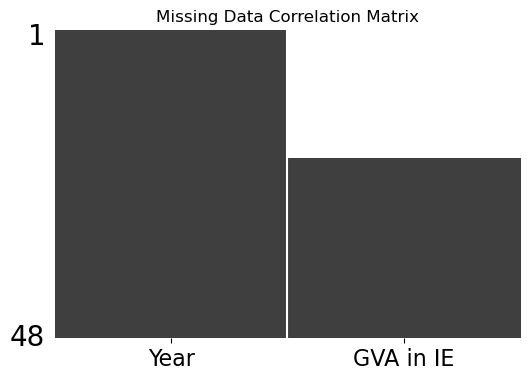

In [437]:
# Set the figure size
fig, axes = plt.subplots(figsize=(6, 4))

# Visualize the correlation of missing data between columns
msno.matrix(gva_ie, ax=axes, sparkline=False)

# Set the title of the figure
plt.title('Missing Data Correlation Matrix')

# Change the position of the xticks labels
plt.gca().xaxis.tick_bottom()

# Change the x-axis label rotation to 0 degrees
plt.xticks(rotation=0, ha='center')

# Display the visualization
plt.show()

- Past year data is missing but from starting point to ending point there is no missing data so filling the missing values is not necessary in this case

In [438]:
# Let's change the "," to "." in the GVA in IE column
gva_ie['GVA in IE'] = gva_ie['GVA in IE'].str.replace(',', '.')

In [439]:
gva_ie.sample(10)

,Year,GVA in IE
29,2004,11.947.10
30,2005,14.622.00
20,1995,2.822.90
25,2000,6.931.00
33,2008,11.049.20
14,1989,NaN
7,1982,NaN
28,2003,9.933.10
24,1999,5.582.90
21,1996,3.162.40


In [440]:
# Drop rows with missing values in the 'GVA in IE' column
gva_ie = gva_ie.dropna(subset=['GVA in IE'])


In [441]:
# Remove non-numeric characters and convert the 'GVA in IE' column to float
gva_ie['GVA in IE'] = gva_ie['GVA in IE'].str.replace('[^\d.]', '', regex=True)

In [442]:
gva_ie.head()

,Year,GVA in IE
20,1995,2.822.90
21,1996,3.162.40
22,1997,3.963.00
23,1998,4.604.50
24,1999,5.582.90


In [443]:
# Remove non-numeric characters and convert the 'GVA in IE' column to float specifically for the "."
gva_ie['GVA in IE'] = gva_ie['GVA in IE'].str.replace('.', '', regex=False).astype(float)

In [444]:
# Let's change the type of the GVA in IE column to float
gva_ie['GVA in IE'] = gva_ie['GVA in IE'].astype(int)

In [445]:
gva_ie.head()

,Year,GVA in IE
20,1995,282290
21,1996,316240
22,1997,396300
23,1998,460450
24,1999,558290


In [446]:
gva_ie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 20 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype        
---  ------     --------------  -----        
 0   Year       28 non-null     period[A-DEC]
 1   GVA in IE  28 non-null     int64        
dtypes: int64(1), period[A-DEC](1)
memory usage: 672.0 bytes


In [447]:
# Resampling the DataFrame to quarterly periods and interpolating missing values
gva_ie.set_index('Year', inplace=True)

# Interpolate the missing values within each quarter using linear interpolation method
gva_ie = gva_ie.resample('Q').interpolate()

gva_ie.head(10)

,GVA in IE
Year,
1995Q1,282290.0
1995Q2,290777.5
1995Q3,299265.0
1995Q4,307752.5
1996Q1,316240.0
1996Q2,336255.0
1996Q3,356270.0
1996Q4,376285.0
1997Q1,396300.0


# Merge the datasets for hypothesis test, visualisation and machine learning

- Planning Permission and Building Cost

In [448]:
# Let's merge the planning_permission and house_prices DataFrames
permissions_n_cost = pd.merge(planning_permission, building_cost, on='Year', how='outer')

permissions_n_cost.head(10)

,Year,Construction Permission,House Construction Cost
0,1977Q1,0.0,134.500
1,1977Q2,0.0,137.875
2,1977Q3,0.0,141.250
3,1977Q4,0.0,144.625
4,1978Q1,0.0,148.000
5,1978Q2,0.0,153.750
6,1978Q3,0.0,159.500
7,1978Q4,0.0,165.250
8,1979Q1,0.0,171.000
9,1979Q2,0.0,181.125


- Planning Permission, House Building Cost and Population

In [449]:
permissions_n_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   Year                     192 non-null    period[Q-DEC]
 1   Construction Permission  184 non-null    float64      
 2   House Construction Cost  168 non-null    float64      
dtypes: float64(2), period[Q-DEC](1)
memory usage: 4.6 KB


In [450]:
population.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 173 entries, 1979Q1 to 2022Q1
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Ireland Population  173 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


In [451]:
# Let's merge the permissions_n_cost and population DataFrames
permissions_n_cost_n_population = pd.merge(permissions_n_cost, population, on='Year', how='outer')

permissions_n_cost_n_population.head(10)

,Year,Construction Permission,House Construction Cost,Ireland Population
0,1977Q1,0.0,134.500,NaN
1,1977Q2,0.0,137.875,NaN
2,1977Q3,0.0,141.250,NaN
3,1977Q4,0.0,144.625,NaN
4,1978Q1,0.0,148.000,NaN
5,1978Q2,0.0,153.750,NaN
6,1978Q3,0.0,159.500,NaN
7,1978Q4,0.0,165.250,NaN
8,1979Q1,0.0,171.000,3368217.0
9,1979Q2,0.0,181.125,3377615.0


In [452]:
# Keep merging the necessary datasets
permissions_n_cost_n_population_n_labour = pd.merge(permissions_n_cost_n_population, labour_force, on='Year', how='outer')

In [453]:
permissions_n_cost_n_population_n_labour.head()

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force
0,1977Q1,0.0,134.500,NaN,NaN
1,1977Q2,0.0,137.875,NaN,NaN
2,1977Q3,0.0,141.250,NaN,NaN
3,1977Q4,0.0,144.625,NaN,NaN
4,1978Q1,0.0,148.000,NaN,NaN


In [454]:
# Keep merging the necessary datasets
permissions_n_cost_n_population_n_labour_n_gva = pd.merge(permissions_n_cost_n_population_n_labour, gva_ie, on='Year', how='outer')

permissions_n_cost_n_population_n_labour_n_gva.head()

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE
0,1977Q1,0.0,134.500,NaN,NaN,NaN
1,1977Q2,0.0,137.875,NaN,NaN,NaN
2,1977Q3,0.0,141.250,NaN,NaN,NaN
3,1977Q4,0.0,144.625,NaN,NaN,NaN
4,1978Q1,0.0,148.000,NaN,NaN,NaN


In [455]:
# Keep merging the necessary datasets
permissions_n_cost_n_population_n_labour_n_gva_n_house_prices = pd.merge(permissions_n_cost_n_population_n_labour_n_gva, house_prices, on='Year', how='outer')

In [456]:
permissions_n_cost_n_population_n_labour_n_gva_n_house_prices.head()

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
0,1977Q1,0.0,134.500,NaN,NaN,NaN,17149.0,0.0
1,1977Q2,0.0,137.875,NaN,NaN,NaN,18165.0,0.0
2,1977Q3,0.0,141.250,NaN,NaN,NaN,19436.0,0.0
3,1977Q4,0.0,144.625,NaN,NaN,NaN,20042.0,0.0
4,1978Q1,0.0,148.000,NaN,NaN,NaN,22388.0,19320.0


In [457]:
# Let's change the name of the dataframe to gva_factors
gva_factors = permissions_n_cost_n_population_n_labour_n_gva_n_house_prices
gva_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype        
---  ------                             --------------  -----        
 0   Year                               192 non-null    period[Q-DEC]
 1   Construction Permission            184 non-null    float64      
 2   House Construction Cost            168 non-null    float64      
 3   Ireland Population                 173 non-null    float64      
 4   Labour Force                       100 non-null    float64      
 5   GVA in IE                          112 non-null    float64      
 6   New House Prices in IE (€)         168 non-null    float64      
 7   Second Hand House Prices in IE(€)  168 non-null    float64      
dtypes: float64(7), period[Q-DEC](1)
memory usage: 12.1 KB


In [458]:
# Let's change the 0.0 values to NaN
gva_factors = gva_factors.replace(0.0, np.nan)

In [459]:
gva_factors.tail(10)

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
182,2022Q3,7202.0,NaN,NaN,67700.0,1105130.0,NaN,NaN
183,2022Q4,7202.0,NaN,NaN,63300.0,1105130.0,NaN,NaN
184,1975Q1,NaN,100.000,NaN,NaN,NaN,11887.0,NaN
185,1975Q2,NaN,103.625,NaN,NaN,NaN,12837.0,NaN
186,1975Q3,NaN,107.250,NaN,NaN,NaN,13269.0,NaN
187,1975Q4,NaN,110.875,NaN,NaN,NaN,13892.0,NaN
188,1976Q1,NaN,114.500,NaN,NaN,NaN,14738.0,NaN
189,1976Q2,NaN,119.500,NaN,NaN,NaN,15250.0,NaN
190,1976Q3,NaN,124.500,NaN,NaN,NaN,15549.0,NaN
191,1976Q4,NaN,129.500,NaN,NaN,NaN,17130.0,NaN


In [460]:
# Rearrange the rows in the DataFrame
gva_factors = pd.concat([gva_factors.tail(8), gva_factors.iloc[:-8]])

# Reset the index
gva_factors = gva_factors.reset_index(drop=True)

gva_factors.tail(10)


,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
182,2020Q3,8287.50,NaN,5033118.0,59400.0,844820.0,NaN,NaN
183,2020Q4,8414.75,NaN,5048187.0,58000.0,858300.0,NaN,NaN
184,2021Q1,8542.00,NaN,5063257.0,57700.0,871780.0,NaN,NaN
185,2021Q2,8207.00,NaN,5078327.0,47200.0,930117.5,NaN,NaN
186,2021Q3,7872.00,NaN,5093396.0,51100.0,988455.0,NaN,NaN
187,2021Q4,7537.00,NaN,5108466.0,68600.0,1046792.5,NaN,NaN
188,2022Q1,7202.00,NaN,5123536.0,59300.0,1105130.0,NaN,NaN
189,2022Q2,7202.00,NaN,NaN,63800.0,1105130.0,NaN,NaN
190,2022Q3,7202.00,NaN,NaN,67700.0,1105130.0,NaN,NaN
191,2022Q4,7202.00,NaN,NaN,63300.0,1105130.0,NaN,NaN


In [461]:
gva_factors.head(10)

,Year,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
0,1975Q1,NaN,100.000,NaN,NaN,NaN,11887.0,NaN
1,1975Q2,NaN,103.625,NaN,NaN,NaN,12837.0,NaN
2,1975Q3,NaN,107.250,NaN,NaN,NaN,13269.0,NaN
3,1975Q4,NaN,110.875,NaN,NaN,NaN,13892.0,NaN
4,1976Q1,NaN,114.500,NaN,NaN,NaN,14738.0,NaN
5,1976Q2,NaN,119.500,NaN,NaN,NaN,15250.0,NaN
6,1976Q3,NaN,124.500,NaN,NaN,NaN,15549.0,NaN
7,1976Q4,NaN,129.500,NaN,NaN,NaN,17130.0,NaN
8,1977Q1,NaN,134.500,NaN,NaN,NaN,17149.0,NaN
9,1977Q2,NaN,137.875,NaN,NaN,NaN,18165.0,NaN


In [462]:
# Let's import the gva_factors dataset to a csv file
gva_factors.to_csv('gva_factors.csv', index=False)

In [463]:
import plotly.express as px

# Visualize the correlation of missing data between columns
fig = px.imshow(gva_factors.isnull().T, labels=dict(x="Columns", y="Rows"), color_continuous_scale=["darkblue", "lightyellow"])

# Set the title of the figure
fig.update_layout(title="Missing Data Correlation Matrix")

# Change the position of the x-axis labels
fig.update_xaxes(side="bottom")

# Change the x-axis label rotation to 0 degrees
fig.update_xaxes(tickangle=0)

# Show the plot
fig.show()


- There are many missing values in our dataset and for better and accurate analysis missing values must be cleaned

In [464]:
# Let's make the Year column the index of the DataFrame
gva_factors.set_index('Year', inplace=True)

In [465]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create a copy of the original DataFrame
imputed_df = gva_factors.copy()

# Select the columns with missing values
columns_with_missing = ['Construction Permission', 'House Construction Cost', 'Ireland Population', 'Labour Force', 'GVA in IE', 'New House Prices in IE (€)', 'Second Hand House Prices in IE(€)']

# Select only the rows with missing values in the specified columns
missing_rows = imputed_df[columns_with_missing].isnull().any(axis=1)

# Interpolate the missing values in the selected rows and columns using linear interpolation method
imputed_df.loc[missing_rows, columns_with_missing] = imputed_df.loc[missing_rows, columns_with_missing].interpolate(method='linear', axis=0)

# Create a mask for missing values
missing_mask = imputed_df[columns_with_missing].isnull().values

# Convert DataFrame to array for imputation
imputation_array = imputed_df[columns_with_missing].values

# Perform multiple imputation only on missing values
imputer = IterativeImputer(sample_posterior=True, max_iter=10, initial_strategy='mean')
imputed_array = imputer.fit_transform(imputation_array)

# Apply non-negativity constraint to imputed values
imputed_array = np.where(missing_mask & (imputed_array < 0), 0, imputed_array)

# Replace the imputed values in the DataFrame
imputed_df[columns_with_missing] = np.where(missing_mask, imputed_array, imputed_df[columns_with_missing])

# Print the first few rows of the imputed DataFrame
imputed_df.head(10)


,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,8395.590467,100.000,3.098440e+06,28188.964417,0.000000e+00,11887.0,32384.737914
1975Q2,11827.042594,103.625,3.339802e+06,24316.834619,7.950540e+05,12837.0,0.000000
1975Q3,10882.258206,107.250,3.894244e+06,52329.118542,9.212908e+05,13269.0,15462.848769
1975Q4,2953.940672,110.875,3.792037e+06,12804.875101,4.364870e+04,13892.0,0.000000
1976Q1,2765.902572,114.500,3.730873e+06,11091.300360,0.000000e+00,14738.0,220.955484
1976Q2,787.247975,119.500,4.072701e+06,18597.035182,0.000000e+00,15250.0,11127.901932
1976Q3,11200.040744,124.500,3.834696e+06,48548.808198,1.132771e+06,15549.0,15175.771989
1976Q4,5888.665755,129.500,3.842767e+06,28420.209306,3.733481e+05,17130.0,24096.415598
1977Q1,3841.544486,134.500,4.289071e+06,0.000000,2.391769e+05,17149.0,0.000000


In [466]:
# Replace the 0 values to NaN
imputed_df = imputed_df.replace(0, np.nan)

In [467]:
imputed_df.tail()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
2021Q4,7537.0,618.875,5108466.0,68600.0,1046792.5,111981.0,115898.0
2022Q1,7202.0,618.875,5123536.0,59300.0,1105130.0,111981.0,115898.0
2022Q2,7202.0,618.875,5123536.0,63800.0,1105130.0,111981.0,115898.0
2022Q3,7202.0,618.875,5123536.0,67700.0,1105130.0,111981.0,115898.0
2022Q4,7202.0,618.875,5123536.0,63300.0,1105130.0,111981.0,115898.0


In [468]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 192 entries, 1975Q1 to 2022Q4
Freq: Q-DEC
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Construction Permission            190 non-null    float64
 1   House Construction Cost            192 non-null    float64
 2   Ireland Population                 192 non-null    float64
 3   Labour Force                       164 non-null    float64
 4   GVA in IE                          160 non-null    float64
 5   New House Prices in IE (€)         192 non-null    float64
 6   Second Hand House Prices in IE(€)  188 non-null    float64
dtypes: float64(7)
memory usage: 12.0 KB


In [469]:
imputed_df = imputed_df.interpolate(method='linear', axis=0)

In [470]:
imputed_df.head()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,8395.590467,100.000,3.098440e+06,28188.964417,NaN,11887.0,32384.737914
1975Q2,11827.042594,103.625,3.339802e+06,24316.834619,795053.980620,12837.0,23923.793342
1975Q3,10882.258206,107.250,3.894244e+06,52329.118542,921290.762456,13269.0,15462.848769
1975Q4,2953.940672,110.875,3.792037e+06,12804.875101,43648.701306,13892.0,7841.902127
1976Q1,2765.902572,114.500,3.730873e+06,11091.300360,406689.371955,14738.0,220.955484


In [471]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 192 entries, 1975Q1 to 2022Q4
Freq: Q-DEC
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Construction Permission            192 non-null    float64
 1   House Construction Cost            192 non-null    float64
 2   Ireland Population                 192 non-null    float64
 3   Labour Force                       192 non-null    float64
 4   GVA in IE                          191 non-null    float64
 5   New House Prices in IE (€)         192 non-null    float64
 6   Second Hand House Prices in IE(€)  192 non-null    float64
dtypes: float64(7)
memory usage: 12.0 KB


In [472]:
imputed_df.tail()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
2021Q4,7537.0,618.875,5108466.0,68600.0,1046792.5,111981.0,115898.0
2022Q1,7202.0,618.875,5123536.0,59300.0,1105130.0,111981.0,115898.0
2022Q2,7202.0,618.875,5123536.0,63800.0,1105130.0,111981.0,115898.0
2022Q3,7202.0,618.875,5123536.0,67700.0,1105130.0,111981.0,115898.0
2022Q4,7202.0,618.875,5123536.0,63300.0,1105130.0,111981.0,115898.0


In [473]:
# Check for NaN values in the DataFrame
nan_check = imputed_df.isna().any()

# Print columns with NaN values
columns_with_nan = nan_check[nan_check].index
print("Columns with NaN values:")
print(columns_with_nan)

# Check if any NaN values exist in the DataFrame
if nan_check.any():
    print("NaN values exist in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")


Columns with NaN values:
Index(['GVA in IE'], dtype='object')
NaN values exist in the DataFrame.


In [474]:
# Handle the missing values in the DataFrame
imputed_df = imputed_df.interpolate(method='time', axis=0).ffill().bfill()

In [475]:
imputed_df.head()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,8395.590467,100.000,3.098440e+06,28188.964417,795053.980620,11887.0,32384.737914
1975Q2,11827.042594,103.625,3.339802e+06,24316.834619,795053.980620,12837.0,23923.793342
1975Q3,10882.258206,107.250,3.894244e+06,52329.118542,921290.762456,13269.0,15462.848769
1975Q4,2953.940672,110.875,3.792037e+06,12804.875101,43648.701306,13892.0,7841.902127
1976Q1,2765.902572,114.500,3.730873e+06,11091.300360,406689.371955,14738.0,220.955484


In [476]:
# List of columns to round and convert to integers
columns_to_round = ['Construction Permission', 'House Construction Cost', 'Ireland Population',
                    'Labour Force', 'GVA in IE', 'New House Prices in IE (€)',
                    'Second Hand House Prices in IE(€)']

# Apply rounding and conversion to integers using a loop
for column in columns_to_round:
    imputed_df[column] = imputed_df[column].round().astype(int)

imputed_df.head()


,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
1975Q1,8396,100,3098440,28189,795054,11887,32385
1975Q2,11827,104,3339802,24317,795054,12837,23924
1975Q3,10882,107,3894244,52329,921291,13269,15463
1975Q4,2954,111,3792037,12805,43649,13892,7842
1976Q1,2766,114,3730873,11091,406689,14738,221


In [477]:
imputed_df.tail()

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
2021Q4,7537,619,5108466,68600,1046792,111981,115898
2022Q1,7202,619,5123536,59300,1105130,111981,115898
2022Q2,7202,619,5123536,63800,1105130,111981,115898
2022Q3,7202,619,5123536,67700,1105130,111981,115898
2022Q4,7202,619,5123536,63300,1105130,111981,115898


In [478]:
# Drop the rows after 2017Q1 as they contain repeated values and can be biased for the analysis
imputed_df = imputed_df.drop(imputed_df.index[168:])

In [479]:
# Checking the last few rows of the DataFrame
imputed_df.tail(25)

,Construction Permission,House Construction Cost,Ireland Population,Labour Force,GVA in IE,New House Prices in IE (€),Second Hand House Prices in IE(€)
Year,,,,,,,
2010Q4,4371,1022,4570831,38100,184512,229531,272638
2011Q1,4076,1015,4588252,39500,167940,241749,274750
2011Q2,3856,1016,4596932,36900,193250,232174,275233
2011Q3,3637,1016,4605613,38300,218560,226215,253678
2011Q4,3418,1017,4614293,39200,243870,225067,246823
2012Q1,3198,1018,4622974,38000,269180,215587,248302
2012Q2,3233,1019,4631655,37800,288822,227376,251815
2012Q3,3268,1020,4640335,37300,308465,221123,251972
2012Q4,3303,1022,4649016,35700,328108,216810,244350


In [480]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 168 entries, 1975Q1 to 2016Q4
Freq: Q-DEC
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Construction Permission            168 non-null    int64
 1   House Construction Cost            168 non-null    int64
 2   Ireland Population                 168 non-null    int64
 3   Labour Force                       168 non-null    int64
 4   GVA in IE                          168 non-null    int64
 5   New House Prices in IE (€)         168 non-null    int64
 6   Second Hand House Prices in IE(€)  168 non-null    int64
dtypes: int64(7)
memory usage: 10.5 KB


In [481]:
imputed_df.isnull().sum()

Construction Permission              0
House Construction Cost              0
Ireland Population                   0
Labour Force                         0
GVA in IE                            0
New House Prices in IE (€)           0
Second Hand House Prices in IE(€)    0
dtype: int64

In [482]:
# Reset the index to convert the year index into a regular column
imputed_df_reset = imputed_df.reset_index()

In [483]:
# Visualize the correlation of missing data between columns
fig = px.imshow(imputed_df_reset.isnull().T, labels=dict(x="Columns", y="Years"), color_continuous_scale=["darkblue", "lightyellow"])

# Set the title of the figure
fig.update_layout(title="Missing Data Correlation Matrix")

# Change the position of the x-axis labels
fig.update_xaxes(side="bottom")

# Change the x-axis label rotation to 0 degrees
fig.update_xaxes(tickangle=0)

# Show the plot
fig.show()


- Using imputed_df_reset just for showing the missing values, for further analysis imputed_df will be used

In [484]:
# Let's import the imputed_df dataset to a csv file
imputed_df.to_csv('imputed_df_last.csv', index=False)

#### The existing dataframe has undergone imputation and linear interpolation techniques to handle missing values. The imputed values have been carefully generated using advanced algorithms. It is important to note that the subsequent analysis and interpretation will be conducted based on the imputed data, which includes synthetic values for the missing entries.

# DISTRUBITION CHECK

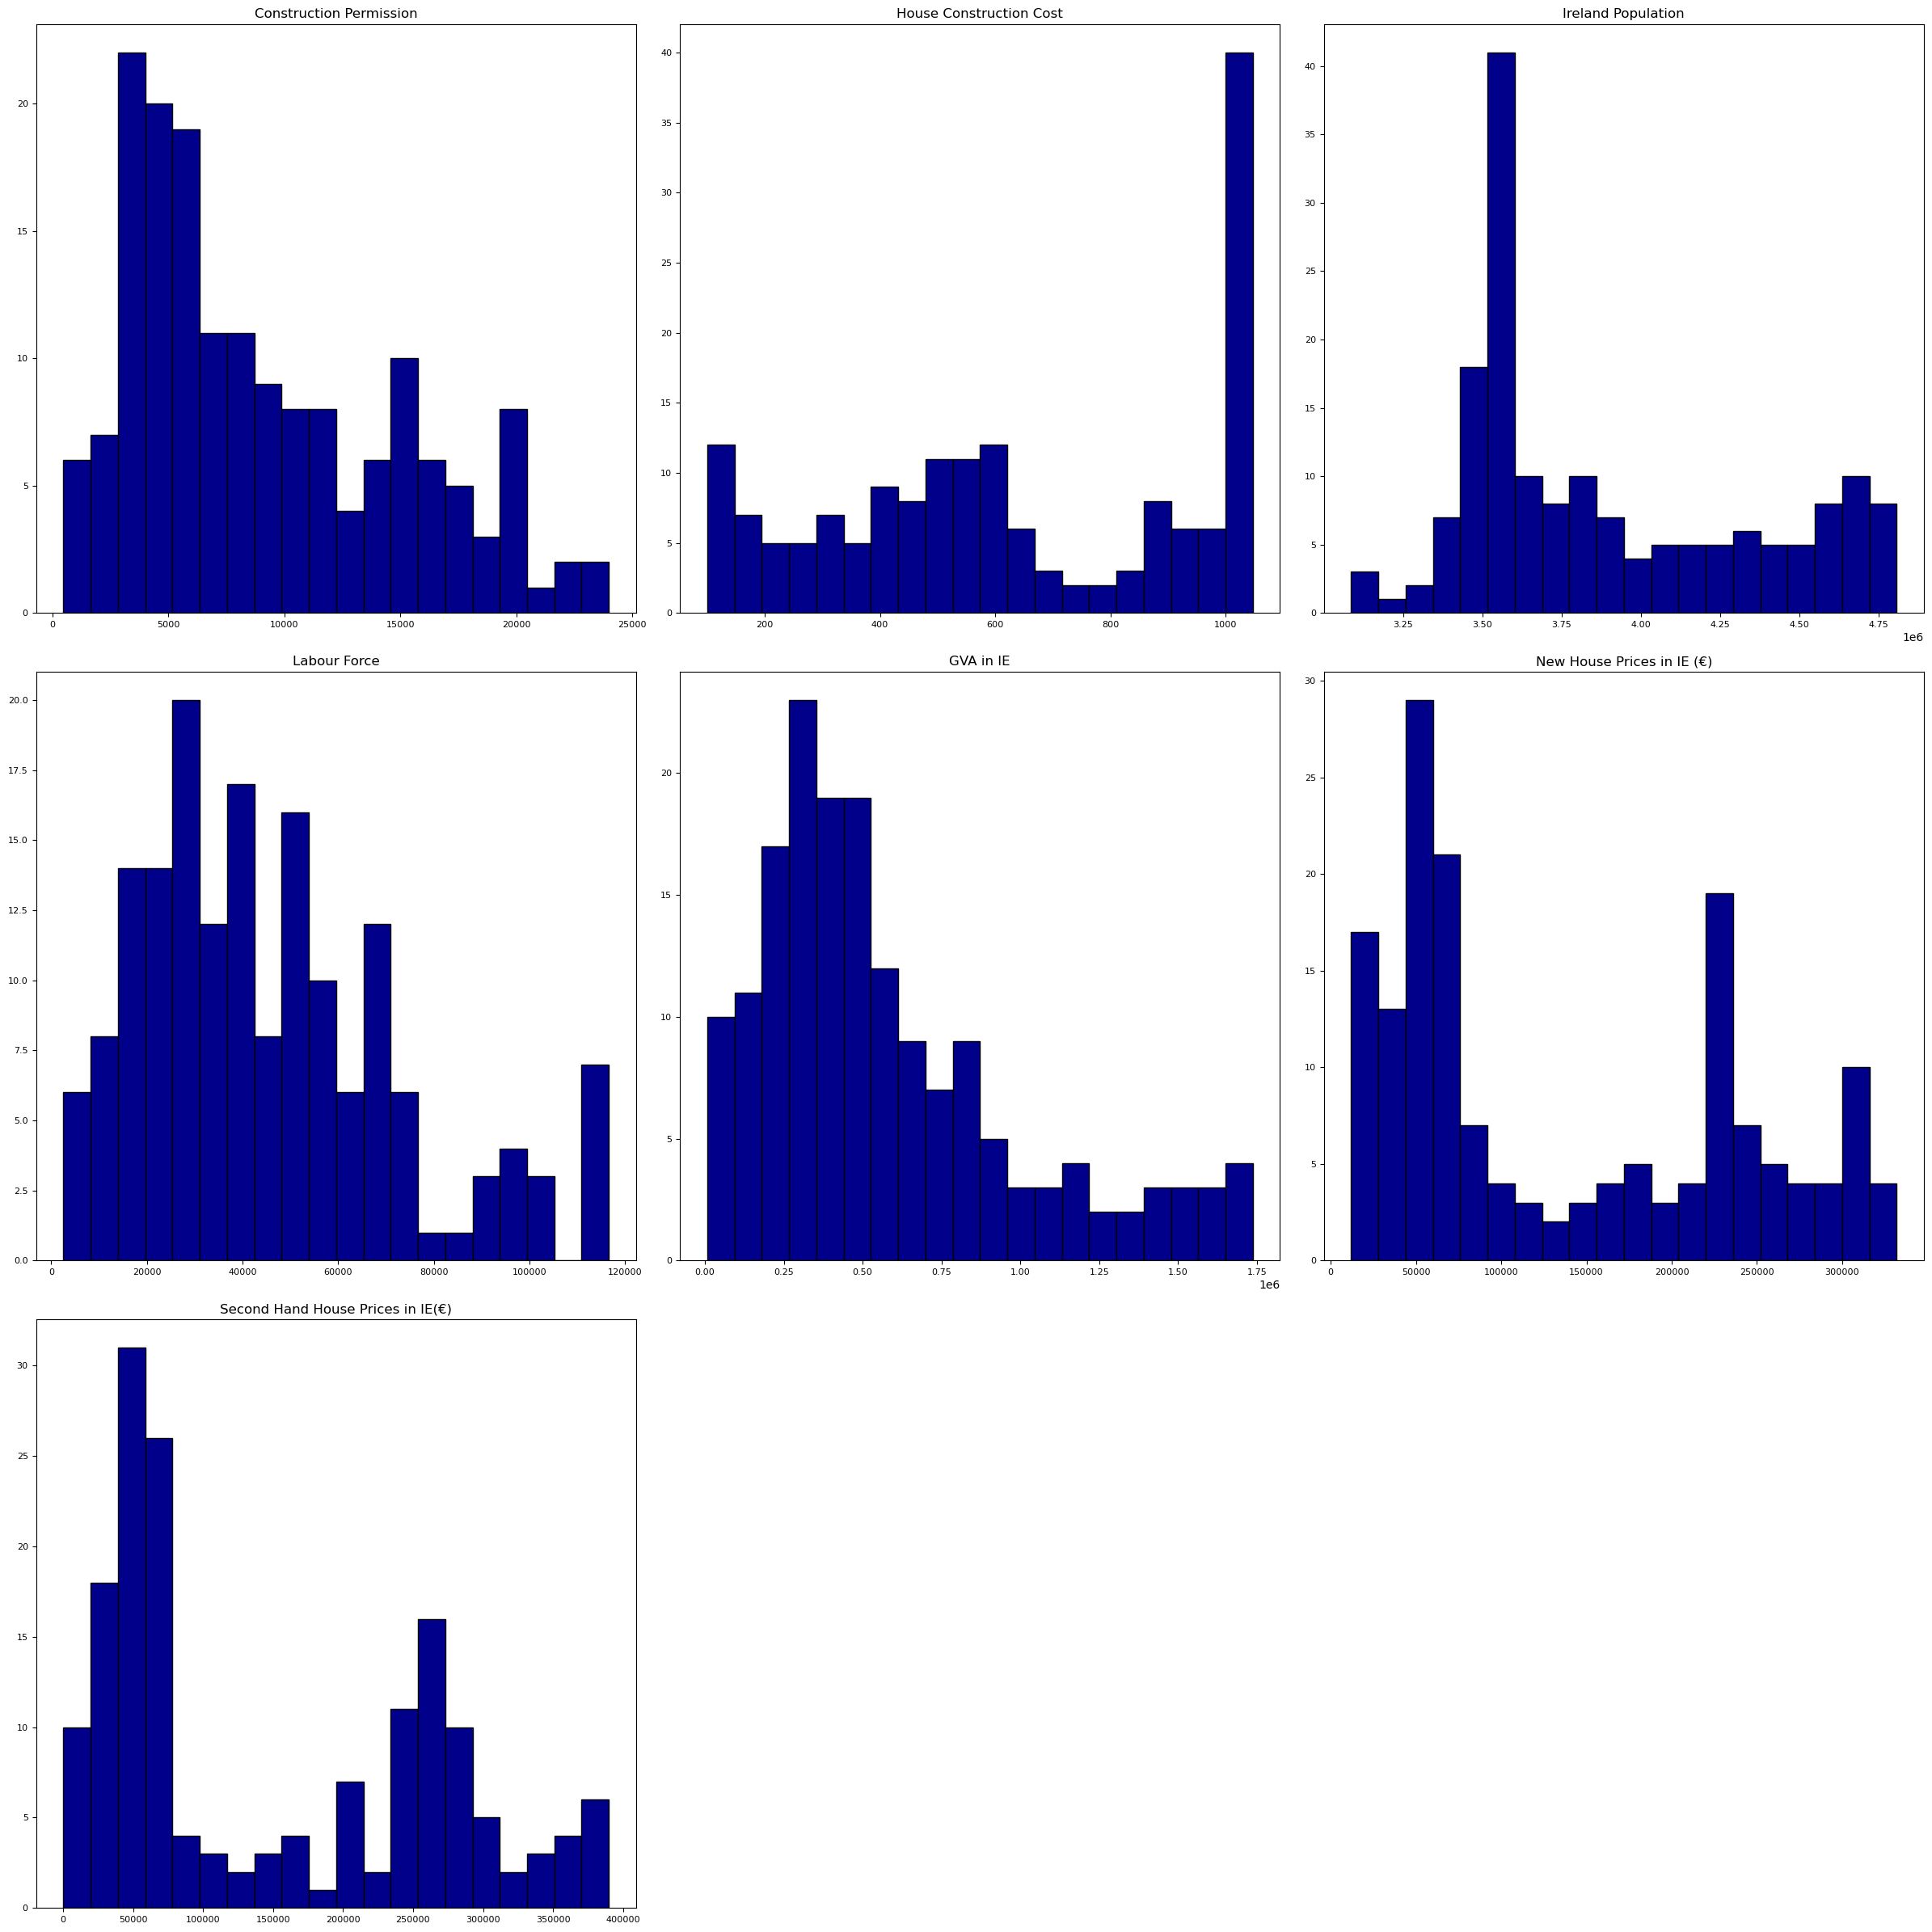

In [485]:
# Let's check the distribution of the variables in the DataFrame
imputed_df.hist(figsize=(20, 20), bins=20, color='darkblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

# Adjust the subplots
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# Show the plot
plt.show()

# HYPOTHESIS TESTS

## Paired T-test
- Compare the means of two related groups
- Since we have multiple countries, I will utilize the pingouin library to perform pairwise t-test calculations specifically tailored to Ireland.

In [486]:
# If you don't have pingouin installed, uncomment the following line to install it
# pip install pingouin

- Contrast: The comparison being made between two countries.
- A, B: The countries being compared.
- Paired: Indicates whether the t-test is paired or not (in this case, it is False. When "paired" is set to False, it means that the samples are independent, and there is no inherent pairing or matching between them.)
- Parametric: Indicates whether parametric t-tests were used.
- T: The t-statistic value(Measure of the difference between the means of two groups in a t-test)
- Dof: Degrees of freedom.
- Alternative: The alternative hypothesis (two-sided in this case).
- p-unc: The uncorrected p-value.
- p-corr: The corrected p-value after applying Bonferroni correction.
- p-adjust: The adjusted p-value using the Bonferroni correction.
- BF10: Bayes Factor, providing evidence for or against the alternative hypothesis.(A BF10 greater than 1 indicates evidence in favor of the alternative hypothesis, while a BF10 less than 1 indicates evidence in favor of the null hypothesis. The magnitude of the BF10 indicates the strength of the evidence, with larger values indicating stronger evidence for the alternative hypothesis.)
- Hedges: Effect size measure (Hedges' g).

In [487]:
import pingouin as pg

In [488]:
# Perform pairwise t-tests
pairwise_comparison = pg.pairwise_ttests(data=eustat_nomissing, dv='Gross Value Added', between='Country', parametric=True, padjust='bonf')

# Print the pairwise comparison results
pairwise_comparison.head()


/opt/anaconda3/lib/python3.9/site-packages/pingouin/pairwise.py:28: UserWarning:

pairwise_ttests is deprecated, use pairwise_tests instead.



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Country,Albania,Austria,False,True,-13.438473,47.653161,two-sided,7.937896e-18,4.723048e-15,bonf,1.304e+18,-2.398164
1,Country,Albania,Belgium,False,True,-21.470463,47.883316,two-sided,3.206279e-26,1.907736e-23,bonf,4.813e+29,-3.834735
2,Country,Albania,Bosnia and Herzegovina,False,True,-5.228169,47.397646,two-sided,3.799098e-06,2.260463e-03,bonf,8951.332,-0.932123
3,Country,Albania,Bulgaria,False,True,-2.144097,72.751359,two-sided,3.536693e-02,1.000000e+00,bonf,1.714,-0.433890
4,Country,Albania,Croatia,False,True,-7.646402,70.820825,two-sided,7.664388e-11,4.560311e-08,bonf,1.041e+08,-1.630774


In [489]:
# Filter the dataset based on p-values below 0.05
ireland_data = pairwise_comparison[pairwise_comparison['A'] == 'Ireland']

# Print the filtered dataset
ireland_data.head()


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
424,Country,Ireland,Italy,False,True,-13.076911,94.0,two-sided,7.094335e-23,4.221129e-20,bonf,3.72e+19,-2.647959
425,Country,Ireland,Latvia,False,True,-3.547948,94.0,two-sided,6.079461e-04,3.617279e-01,bonf,45.598,-0.718428
426,Country,Ireland,Lithuania,False,True,6.156441,94.0,two-sided,1.818282e-08,1.081878e-05,bonf,5.642e+05,1.246625
427,Country,Ireland,Luxembourg,False,True,4.865921,94.0,two-sided,4.575575e-06,2.722467e-03,bonf,3497.493,0.985306
428,Country,Ireland,Malta,False,True,6.595833,94.0,two-sided,2.459582e-09,1.463451e-06,bonf,3.654e+06,1.335598


In [490]:
ireland_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 424 to 441
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Contrast     18 non-null     object 
 1   A            18 non-null     object 
 2   B            18 non-null     object 
 3   Paired       18 non-null     bool   
 4   Parametric   18 non-null     bool   
 5   T            18 non-null     float64
 6   dof          18 non-null     float64
 7   alternative  18 non-null     object 
 8   p-unc        18 non-null     float64
 9   p-corr       18 non-null     float64
 10  p-adjust     18 non-null     object 
 11  BF10         18 non-null     object 
 12  hedges       18 non-null     float64
dtypes: bool(2), float64(5), object(6)
memory usage: 1.7+ KB


In [491]:
# Convert 'p-unc' and 'p-corr' columns to numeric types
ireland_data['p-unc'] = pd.to_numeric(ireland_data['p-unc'], errors='coerce')
ireland_data['p-corr'] = pd.to_numeric(ireland_data['p-corr'], errors='coerce')

# Format p-unc and p-corr columns
ireland_data.loc[:, 'p-unc'] = ireland_data['p-unc'].apply(lambda x: f"{x:.3f}" if not pd.isnull(x) else 'NaN')
ireland_data.loc[:, 'p-corr'] = ireland_data['p-corr'].apply(lambda x: f"{x:.3f}" if not pd.isnull(x) else 'NaN')

# Print the updated DataFrame
ireland_data.head(18)


/var/folders/s9/l0hkzmh95679k8vbcbryv3480000gn/T/ipykernel_1177/1586649040.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s9/l0hkzmh95679k8vbcbryv3480000gn/T/ipykernel_1177/1586649040.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
424,Country,Ireland,Italy,False,True,-13.076911,94.0,two-sided,0.000,0.000,bonf,3.72e+19,-2.647959
425,Country,Ireland,Latvia,False,True,-3.547948,94.0,two-sided,0.001,0.362,bonf,45.598,-0.718428
426,Country,Ireland,Lithuania,False,True,6.156441,94.0,two-sided,0.000,0.000,bonf,5.642e+05,1.246625
427,Country,Ireland,Luxembourg,False,True,4.865921,94.0,two-sided,0.000,0.003,bonf,3497.493,0.985306
428,Country,Ireland,Malta,False,True,6.595833,94.0,two-sided,0.000,0.000,bonf,3.654e+06,1.335598
429,Country,Ireland,Montenegro,False,True,8.395005,94.0,two-sided,0.000,0.000,bonf,1.209e+10,1.699914
430,Country,Ireland,Netherlands,False,True,-8.259217,94.0,two-sided,0.000,0.000,bonf,6.443e+09,-1.672418
431,Country,Ireland,Norway,False,True,-3.404858,94.0,two-sided,0.001,0.580,bonf,30.362,-0.689454
432,Country,Ireland,Poland,False,True,-11.094876,94.0,two-sided,0.000,0.000,bonf,3.895e+15,-2.246614
433,Country,Ireland,Portugal,False,True,-6.016645,94.0,two-sided,0.000,0.000,bonf,3.153e+05,-1.218317


In [492]:
# Convert 'p-corr' column to numeric
ireland_data['p-corr'] = pd.to_numeric(ireland_data['p-corr'], errors='coerce')

# Add 'P-value Category' column
ireland_data.loc[(ireland_data['p-corr'] >= 0.01) & (ireland_data['p-corr'] <= 0.05), 'P-value Category'] = 'Significant'
ireland_data.loc[~((ireland_data['p-corr'] >= 0.01) & (ireland_data['p-corr'] <= 0.05)), 'P-value Category'] = 'Insignificant'

# Print the updated DataFrame
ireland_data[['Contrast', 'A', 'B', 'P-value Category']]


/var/folders/s9/l0hkzmh95679k8vbcbryv3480000gn/T/ipykernel_1177/469023613.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s9/l0hkzmh95679k8vbcbryv3480000gn/T/ipykernel_1177/469023613.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Contrast,A,B,P-value Category
424,Country,Ireland,Italy,Insignificant
425,Country,Ireland,Latvia,Insignificant
426,Country,Ireland,Lithuania,Insignificant
427,Country,Ireland,Luxembourg,Insignificant
428,Country,Ireland,Malta,Insignificant
429,Country,Ireland,Montenegro,Insignificant
430,Country,Ireland,Netherlands,Insignificant
431,Country,Ireland,Norway,Insignificant
432,Country,Ireland,Poland,Insignificant
433,Country,Ireland,Portugal,Insignificant


# Analysis of Variance (ANOVA)

- ANOVA for compare the Value Addition for Gross in Ireland with according to other European Countries.
- I will preprocess the eustat_original DataFrame to make it suitable for ANOVA test. The overall structure of the DataFrame is fine, but it requires some organization and adjustments.

In [493]:
eustat_T = eustat_original.T
eustat_T.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1975,:,:,:,"2,045.30",:,:,:,:,:,"20,036.70",...,:,:,:,"1,453.40",:,:,:,:,:,:
1976,:,:,:,"2,390.60",:,:,:,:,:,"21,680.90",...,:,:,:,"1,714.50",:,:,:,:,:,:
1977,:,:,:,"2,522.10",:,:,:,:,:,"22,869.30",...,:,:,:,"1,957.60",:,:,:,:,:,:
1978,:,:,:,"2,602.50",:,:,:,:,:,"25,723.60",...,:,:,:,"2,112.50",:,:,:,:,:,:


In [494]:
# Let's pack the indeces into a column
eustat_T.reset_index(level=0, inplace=True)

# Let's replace the indeces with a new column name 'Year'
eustat_T.rename(columns={'index': 'Year'}, inplace=True)

# Let's check the first few rows of the DataFrame
eustat_T.head()

,Year,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1,1975,:,:,:,"2,045.30",:,:,:,:,:,...,:,:,:,"1,453.40",:,:,:,:,:,:
2,1976,:,:,:,"2,390.60",:,:,:,:,:,...,:,:,:,"1,714.50",:,:,:,:,:,:
3,1977,:,:,:,"2,522.10",:,:,:,:,:,...,:,:,:,"1,957.60",:,:,:,:,:,:
4,1978,:,:,:,"2,602.50",:,:,:,:,:,...,:,:,:,"2,112.50",:,:,:,:,:,:


In [495]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    49 non-null     object
 1   0       49 non-null     object
 2   1       49 non-null     object
 3   2       49 non-null     object
 4   3       49 non-null     object
 5   4       49 non-null     object
 6   5       49 non-null     object
 7   6       49 non-null     object
 8   7       49 non-null     object
 9   8       49 non-null     object
 10  9       49 non-null     object
 11  10      49 non-null     object
 12  11      49 non-null     object
 13  12      49 non-null     object
 14  13      49 non-null     object
 15  14      49 non-null     object
 16  15      49 non-null     object
 17  16      49 non-null     object
 18  17      49 non-null     object
 19  18      49 non-null     object
 20  19      49 non-null     object
 21  20      49 non-null     object
 22  21      49 non-null     obje

In [496]:
# Let's check the indeces of the DataFrame
eustat_T.index

RangeIndex(start=0, stop=49, step=1)

In [497]:
eustat_T.head()

,Year,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1,1975,:,:,:,"2,045.30",:,:,:,:,:,...,:,:,:,"1,453.40",:,:,:,:,:,:
2,1976,:,:,:,"2,390.60",:,:,:,:,:,...,:,:,:,"1,714.50",:,:,:,:,:,:
3,1977,:,:,:,"2,522.10",:,:,:,:,:,...,:,:,:,"1,957.60",:,:,:,:,:,:
4,1978,:,:,:,"2,602.50",:,:,:,:,:,...,:,:,:,"2,112.50",:,:,:,:,:,:


In [498]:
# Let's change the first row of the DataFrame with the column of the DataFrame
eustat_T.columns = eustat_T.iloc[0]

eustat_T.head()


,Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
0,Country,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1,1975,:,:,:,"2,045.30",:,:,:,:,:,...,:,:,:,"1,453.40",:,:,:,:,:,:
2,1976,:,:,:,"2,390.60",:,:,:,:,:,...,:,:,:,"1,714.50",:,:,:,:,:,:
3,1977,:,:,:,"2,522.10",:,:,:,:,:,...,:,:,:,"1,957.60",:,:,:,:,:,:
4,1978,:,:,:,"2,602.50",:,:,:,:,:,...,:,:,:,"2,112.50",:,:,:,:,:,:


In [499]:
# Let's change the name of the first column to 'Year' but we will need to do this again this one is just for identifying the column
eustat_T.rename(columns={eustat_T.columns[0]: 'Year'}, inplace=True)

# Delete the first row of the DataFrame
eustat_T = eustat_T.iloc[1:]

# Set the year column as the index of the DataFrame
eustat_T.set_index('Year', inplace=True)

In [500]:
# Let's align the index and column names
eustat_T.index.name = None

In [501]:
# Set an index name for the DataFrame one last time to organise the dataframe
eustat_T.columns.name = "Year"

In [502]:
# Let's check the first few rows of the DataFrame
eustat_T.head()

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1975,:,:,:,"2,045.30",:,:,:,:,:,"20,036.70",...,:,:,:,"1,453.40",:,:,:,:,:,:
1976,:,:,:,"2,390.60",:,:,:,:,:,"21,680.90",...,:,:,:,"1,714.50",:,:,:,:,:,:
1977,:,:,:,"2,522.10",:,:,:,:,:,"22,869.30",...,:,:,:,"1,957.60",:,:,:,:,:,:
1978,:,:,:,"2,602.50",:,:,:,:,:,"25,723.60",...,:,:,:,"2,112.50",:,:,:,:,:,:
1979,:,:,:,"2,518.70",:,:,:,:,:,"28,587.40",...,:,:,:,"1,920.60",:,:,:,:,:,:


In [503]:
# Let's check the index of the DataFrame
eustat_T.index

Index(['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [504]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1975 to 2022
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Belgium                 48 non-null     object
 1   Bulgaria                48 non-null     object
 2   Czechia                 48 non-null     object
 3   Denmark                 48 non-null     object
 4   Germany                 48 non-null     object
 5   Estonia                 48 non-null     object
 6   Ireland                 48 non-null     object
 7   Greece                  48 non-null     object
 8   Spain                   48 non-null     object
 9   France                  48 non-null     object
 10  Croatia                 48 non-null     object
 11  Italy                   48 non-null     object
 12  Cyprus                  48 non-null     object
 13  Latvia                  48 non-null     object
 14  Lithuania               48 non-null     object
 15  Luxembou

In [505]:
# Let's convert the index to datetime
eustat_T.index = pd.to_datetime(eustat_T.index)

In [506]:
# Let's change the ":" to NaN values
eustat_T = eustat_T.replace(':', np.nan)

# Let's check the first few rows of the DataFrame
eustat_T.head(50)

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1975-01-01,NaN,NaN,NaN,"2,045.30",NaN,NaN,NaN,NaN,NaN,"20,036.70",...,NaN,NaN,NaN,"1,453.40",NaN,NaN,NaN,NaN,NaN,NaN
1976-01-01,NaN,NaN,NaN,"2,390.60",NaN,NaN,NaN,NaN,NaN,"21,680.90",...,NaN,NaN,NaN,"1,714.50",NaN,NaN,NaN,NaN,NaN,NaN
1977-01-01,NaN,NaN,NaN,"2,522.10",NaN,NaN,NaN,NaN,NaN,"22,869.30",...,NaN,NaN,NaN,"1,957.60",NaN,NaN,NaN,NaN,NaN,NaN
1978-01-01,NaN,NaN,NaN,"2,602.50",NaN,NaN,NaN,NaN,NaN,"25,723.60",...,NaN,NaN,NaN,"2,112.50",NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01,NaN,NaN,NaN,"2,518.70",NaN,NaN,NaN,NaN,NaN,"28,587.40",...,NaN,NaN,NaN,"1,920.60",NaN,NaN,NaN,NaN,NaN,NaN
1980-01-01,NaN,NaN,NaN,"2,790.80",NaN,NaN,NaN,NaN,NaN,"33,291.00",...,"2,555.40",NaN,NaN,"2,061.80",NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,NaN,NaN,NaN,"2,564.20",NaN,NaN,NaN,NaN,NaN,"34,214.40",...,"3,083.90",NaN,NaN,"2,334.40",NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,NaN,NaN,NaN,"2,627.70",NaN,NaN,NaN,NaN,NaN,"36,563.70",...,"3,569.60",NaN,NaN,"2,770.40",NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,NaN,NaN,NaN,"2,775.10",NaN,NaN,NaN,NaN,NaN,"36,565.60",...,"3,950.90",NaN,NaN,"2,888.30",NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,NaN,NaN,NaN,"3,174.00",NaN,NaN,NaN,NaN,NaN,"36,936.70",...,"4,447.90",NaN,NaN,"3,131.80",NaN,NaN,NaN,NaN,NaN,NaN


- For ANOVA test we need to drop the NaN values. According to Ireland we will adjust the DataFrame, first let's see the NaN valued rows in Ireland Columns.

In [507]:
# Let's see which rows have missing values in Ireland because the research is based on Ireland
eustat_T[eustat_T['Ireland'].isnull()]

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1975-01-01,NaN,NaN,NaN,"2,045.30",NaN,NaN,NaN,NaN,NaN,"20,036.70",...,NaN,NaN,NaN,"1,453.40",NaN,NaN,NaN,NaN,NaN,NaN
1976-01-01,NaN,NaN,NaN,"2,390.60",NaN,NaN,NaN,NaN,NaN,"21,680.90",...,NaN,NaN,NaN,"1,714.50",NaN,NaN,NaN,NaN,NaN,NaN
1977-01-01,NaN,NaN,NaN,"2,522.10",NaN,NaN,NaN,NaN,NaN,"22,869.30",...,NaN,NaN,NaN,"1,957.60",NaN,NaN,NaN,NaN,NaN,NaN
1978-01-01,NaN,NaN,NaN,"2,602.50",NaN,NaN,NaN,NaN,NaN,"25,723.60",...,NaN,NaN,NaN,"2,112.50",NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01,NaN,NaN,NaN,"2,518.70",NaN,NaN,NaN,NaN,NaN,"28,587.40",...,NaN,NaN,NaN,"1,920.60",NaN,NaN,NaN,NaN,NaN,NaN
1980-01-01,NaN,NaN,NaN,"2,790.80",NaN,NaN,NaN,NaN,NaN,"33,291.00",...,"2,555.40",NaN,NaN,"2,061.80",NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,NaN,NaN,NaN,"2,564.20",NaN,NaN,NaN,NaN,NaN,"34,214.40",...,"3,083.90",NaN,NaN,"2,334.40",NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,NaN,NaN,NaN,"2,627.70",NaN,NaN,NaN,NaN,NaN,"36,563.70",...,"3,569.60",NaN,NaN,"2,770.40",NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,NaN,NaN,NaN,"2,775.10",NaN,NaN,NaN,NaN,NaN,"36,565.60",...,"3,950.90",NaN,NaN,"2,888.30",NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,NaN,NaN,NaN,"3,174.00",NaN,NaN,NaN,NaN,NaN,"36,936.70",...,"4,447.90",NaN,NaN,"3,131.80",NaN,NaN,NaN,NaN,NaN,NaN


- The DataFrame has NaN values until 1994-01-01 in Ireland column because of that we will drop the columns before 1994

In [508]:
# Drop rows before 1994-01-01
eustat_T = eustat_T[eustat_T.index >= pd.to_datetime('1995-01-01')]

In [509]:
eustat_T.head()

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Finland,Sweden,Iceland,Norway,Switzerland,United Kingdom,Bosnia and Herzegovina,Montenegro,Albania,Serbia
1995-01-01,"10,507.10",459.3,"3,201.50","5,623.50","123,093.90",169.7,"2,822.90","5,296.40","40,332.80","57,773.00",...,"4,327.60","7,916.70",336.1,"4,088.20","17,813.20","49,108.90",NaN,NaN,NaN,"1,707.00"
1996-01-01,"10,028.90",286.9,"3,716.80","6,316.50","114,548.00",200.2,"3,162.40","5,993.40","42,032.40","56,144.80",...,"4,752.00","8,786.60",338,"4,500.50","16,080.90","53,629.90",NaN,NaN,179.5,937.1
1997-01-01,"10,148.30",254.9,"3,736.10","6,117.40","107,153.80",238.5,"3,963.00","6,954.10","42,580.80","54,961.70",...,"5,203.00","8,583.70",510.3,"5,314.00","13,752.60","62,719.90",NaN,NaN,172.7,"1,144.70"
1998-01-01,"10,295.20",525.8,"3,998.90","6,972.70","102,518.90",312.1,"4,604.50","7,650.70","46,325.80","55,823.90",...,"5,959.10","8,859.80",582.4,"5,665.10","13,978.30","72,697.80",NaN,NaN,163.4,867
1999-01-01,"11,136.00",632.6,"3,772.20","7,868.10","101,737.00",270.8,"5,582.90","8,880.00","52,401.00","59,356.00",...,"6,602.00","9,566.50",617.7,"5,798.90","14,055.20","84,001.30",NaN,NaN,259.1,799


In [510]:
# Drop the columns with missing values
eustat_T = eustat_T.dropna(axis=1)

In [511]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Belgium      28 non-null     object
 1   Bulgaria     28 non-null     object
 2   Czechia      28 non-null     object
 3   Denmark      28 non-null     object
 4   Germany      28 non-null     object
 5   Estonia      28 non-null     object
 6   Ireland      28 non-null     object
 7   Greece       28 non-null     object
 8   Spain        28 non-null     object
 9   France       28 non-null     object
 10  Croatia      28 non-null     object
 11  Italy        28 non-null     object
 12  Cyprus       28 non-null     object
 13  Latvia       28 non-null     object
 14  Lithuania    28 non-null     object
 15  Luxembourg   28 non-null     object
 16  Hungary      28 non-null     object
 17  Malta        28 non-null     object
 18  Netherlands  28 non-null     object
 19  Austria    

In [512]:
eustat_T.head(50)

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,Serbia
1995-01-01,"10,507.10",459.3,"3,201.50","5,623.50","123,093.90",169.7,"2,822.90","5,296.40","40,332.80","57,773.00",...,"5,223.90","1,805.40",809.7,600.3,"4,327.60","7,916.70",336.1,"4,088.20","17,813.20","1,707.00"
1996-01-01,"10,028.90",286.9,"3,716.80","6,316.50","114,548.00",200.2,"3,162.40","5,993.40","42,032.40","56,144.80",...,"5,590.90","1,895.50",908.3,955.5,"4,752.00","8,786.60",338,"4,500.50","16,080.90",937.1
1997-01-01,"10,148.30",254.9,"3,736.10","6,117.40","107,153.80",238.5,"3,963.00","6,954.10","42,580.80","54,961.70",...,"6,417.90","1,825.90","1,028.90","1,065.90","5,203.00","8,583.70",510.3,"5,314.00","13,752.60","1,144.70"
1998-01-01,"10,295.20",525.8,"3,998.90","6,972.70","102,518.90",312.1,"4,604.50","7,650.70","46,325.80","55,823.90",...,"7,017.20","2,037.30","1,095.70","1,113.60","5,959.10","8,859.80",582.4,"5,665.10","13,978.30",867
1999-01-01,"11,136.00",632.6,"3,772.20","7,868.10","101,737.00",270.8,"5,582.90","8,880.00","52,401.00","59,356.00",...,"7,616.70","1,757.50","1,275.30",961.8,"6,602.00","9,566.50",617.7,"5,798.90","14,055.20",799
2000-01-01,"11,796.00",646.8,"3,763.40","8,377.70","98,046.00",327.1,"6,931.00","8,948.10","59,546.00","64,400.00",...,"8,602.80","2,119.00","1,244.80","1,129.10","7,344.00","10,554.80",773.9,"6,396.60","14,945.40",802.8
2001-01-01,"12,029.40",744,"4,146.40","8,116.70","93,163.00",367.9,"8,081.40","9,574.30","67,287.00","68,702.00",...,"9,226.60","2,571.60","1,253.20","1,193.50","7,464.00","10,761.40",675.8,"7,015.70","15,871.60",331.2
2002-01-01,"12,027.00",776.3,"5,081.40","8,405.40","89,431.00",435.8,"8,671.80","10,301.40","74,418.00","71,601.00",...,"9,479.40","3,004.80","1,281.20","1,481.30","7,254.00","11,652.70",704,"8,210.30","16,909.80",596.7
2003-01-01,"12,369.80",801.9,"5,288.80","8,936.20","85,419.00",514.6,"9,933.10","14,318.20","80,950.00","75,103.00",...,"9,157.80","3,226.10","1,400.00","1,594.40","7,652.00","12,316.60",712.4,"8,160.90","16,408.50",697.6
2004-01-01,"13,126.90",902.2,"5,657.70","9,373.50","83,134.00",604.4,"11,947.10","16,056.90","87,547.00","80,824.00",...,"9,465.00","3,853.50","1,474.80","1,897.20","8,329.00","13,635.00",879.3,"8,924.60","16,101.30",777.9


In [513]:
# Remove commas from the values
eustat_T = eustat_T.replace(',', '', regex=True)

# Let's change the type of the attributes to float
eustat_T = eustat_T.astype(float)

# Let's check the first few rows of the DataFrame
eustat_T.head()


Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,Serbia
1995-01-01,10507.1,459.3,3201.5,5623.5,123093.9,169.7,2822.9,5296.4,40332.8,57773.0,...,5223.9,1805.4,809.7,600.3,4327.6,7916.7,336.1,4088.2,17813.2,1707.0
1996-01-01,10028.9,286.9,3716.8,6316.5,114548.0,200.2,3162.4,5993.4,42032.4,56144.8,...,5590.9,1895.5,908.3,955.5,4752.0,8786.6,338.0,4500.5,16080.9,937.1
1997-01-01,10148.3,254.9,3736.1,6117.4,107153.8,238.5,3963.0,6954.1,42580.8,54961.7,...,6417.9,1825.9,1028.9,1065.9,5203.0,8583.7,510.3,5314.0,13752.6,1144.7
1998-01-01,10295.2,525.8,3998.9,6972.7,102518.9,312.1,4604.5,7650.7,46325.8,55823.9,...,7017.2,2037.3,1095.7,1113.6,5959.1,8859.8,582.4,5665.1,13978.3,867.0
1999-01-01,11136.0,632.6,3772.2,7868.1,101737.0,270.8,5582.9,8880.0,52401.0,59356.0,...,7616.7,1757.5,1275.3,961.8,6602.0,9566.5,617.7,5798.9,14055.2,799.0


In [514]:
eustat_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Belgium      28 non-null     float64
 1   Bulgaria     28 non-null     float64
 2   Czechia      28 non-null     float64
 3   Denmark      28 non-null     float64
 4   Germany      28 non-null     float64
 5   Estonia      28 non-null     float64
 6   Ireland      28 non-null     float64
 7   Greece       28 non-null     float64
 8   Spain        28 non-null     float64
 9   France       28 non-null     float64
 10  Croatia      28 non-null     float64
 11  Italy        28 non-null     float64
 12  Cyprus       28 non-null     float64
 13  Latvia       28 non-null     float64
 14  Lithuania    28 non-null     float64
 15  Luxembourg   28 non-null     float64
 16  Hungary      28 non-null     float64
 17  Malta        28 non-null     float64
 18  Netherlands  28 non-null     flo

In [515]:
# Check the columns names for picking the right columns
eustat_T.columns

Index(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy', 'Cyprus',
       'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Iceland', 'Norway', 'Switzerland', 'Serbia'],
      dtype='object', name='Year')

In [516]:
# Let's check the MIN and MAX values of the Ireland column
print("Minimum Value of Ireland", eustat_T['Ireland'].min(), "and Maximum Value of Ireland", eustat_T['Ireland'].max())

Minimum Value of Ireland 1679.4 and Maximum Value of Ireland 17365.0


In [517]:
# Let's just keep the columns which is few of geographically close to Ireland and the rest of the columns will be dropped
eustat_T = eustat_T[['Ireland', 'Norway', 'Belgium', 'Netherlands', 'Portugal']]
eustat_T.head()

Year,Ireland,Norway,Belgium,Netherlands,Portugal
1995-01-01,2822.9,4088.2,10507.1,16314.8,5223.9
1996-01-01,3162.4,4500.5,10028.9,16385.7,5590.9
1997-01-01,3963.0,5314.0,10148.3,16471.0,6417.9
1998-01-01,4604.5,5665.1,10295.2,17566.8,7017.2
1999-01-01,5582.9,5798.9,11136.0,19935.0,7616.7


In [518]:
# Let's check the skewness of the columns
eustat_T.skew()

Year
Ireland        0.797022
Norway        -0.123050
Belgium        0.183474
Netherlands    0.067926
Portugal      -0.259424
dtype: float64

In [519]:
# Let's check the kurtosis of the columns
eustat_T.kurtosis()

Year
Ireland        0.078371
Norway        -1.558988
Belgium       -0.947032
Netherlands   -0.438420
Portugal      -1.121455
dtype: float64

In [520]:
# Let's create a plotly express boxplot for the columns
fig = px.box(eustat_T, y=['Ireland', 'Norway', 'Belgium', 'Netherlands', 'Portugal'], title='Boxplot of the Value Addition of Gross from Ireland, Norway, Belgium, Netherlands and Portugal')

# Let's add a horizontal line to the plot
fig.add_hline(y=0, line_width=3, line_dash="dash", line_color="green")

# Set the name of the y-axis
fig.update_yaxes(title_text='Value Addition of Gross')

# Set the name of the x-axis
fig.update_xaxes(title_text='Countries')

fig.show()

In [521]:
from scipy import stats
# Perform the ANOVA
anova_results = stats.f_oneway(eustat_T['Ireland'], eustat_T['Norway'], eustat_T['Belgium'], eustat_T['Netherlands'], eustat_T['Portugal'])

print(f"F statistic: {anova_results.statistic}")
print(f"P-value: {anova_results.pvalue}")

F statistic: 70.1783670124764
P-value: 4.978816246598205e-32


- This means there is a statistically significant difference in the mean Value Addition of Gross from the Construction Sector between at least two of the countries (Ireland, France, Belgium, Netherlands, Portugal).

In [522]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Reshape the dataframe for the Tukey HSD test
melted_eustat_T = pd.melt(eustat_T.reset_index(), id_vars=['index'], value_vars=['Ireland', 'Norway', 'Belgium', 'Netherlands', 'Portugal'])


melted_eustat_T .head()

,index,Year,value
0,1995-01-01,Ireland,2822.9
1,1996-01-01,Ireland,3162.4
2,1997-01-01,Ireland,3963.0
3,1998-01-01,Ireland,4604.5
4,1999-01-01,Ireland,5582.9


In [523]:
# Change the name of the year column name to 'Country'
melted_eustat_T .rename(columns={'Year': 'Country'}, inplace=True)

# Change the name of the variable column name to 'Value Addition of Gross'
melted_eustat_T .rename(columns={'value': 'Value Addition of Gross'}, inplace=True)

In [524]:
# Perform the Tukey HSD test
posthoc = pairwise_tukeyhsd(melted_eustat_T ['Value Addition of Gross'], melted_eustat_T ['Country'], alpha=0.05)

print(posthoc)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2     meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------
    Belgium     Ireland  -9204.0321    0.0  -13003.412  -5404.6522   True
    Belgium Netherlands  10938.2107    0.0   7138.8308  14737.5906   True
    Belgium      Norway  -2466.9536 0.3806  -6266.3335   1332.4263  False
    Belgium    Portugal  -8452.4607    0.0 -12251.8406  -4653.0808   True
    Ireland Netherlands  20142.2429    0.0   16342.863  23941.6228   True
    Ireland      Norway   6737.0786    0.0   2937.6987  10536.4585   True
    Ireland    Portugal    751.5714 0.9821  -3047.8085   4550.9513  False
Netherlands      Norway -13405.1643    0.0 -17204.5442  -9605.7844   True
Netherlands    Portugal -19390.6714    0.0 -23190.0513 -15591.2915   True
     Norway    Portugal  -5985.5071 0.0002   -9784.887  -2186.1272   True
--------------------------------------